In [ ]:
#read files
from google.colab import drive
drive.mount('/content/drive')
path1 = '/content/drive/My Drive/ML/price/train.csv'
import pandas as pd
df_train  = pd.read_csv(path1)
df_train.shape
path2 = '/content/drive/My Drive/ML/price/test.csv'
df_test  = pd.read_csv(path2).

Mounted at /content/drive


Data Modeing

In [ ]:
df_train.shape
df_train.info()
print(df_test.isnull().sum().to_string())

In [ ]:
df_train.dropna(subset=['LotFrontage','GarageYrBlt','MasVnrArea'], inplace=True)
df_train.dropna(subset=['KitchenQual','Functional','SaleType','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical'], inplace=True)
df_test.dropna(subset=['LotFrontage','GarageYrBlt','MasVnrArea'], inplace=True)
df_test.dropna(subset=['KitchenQual','Functional','SaleType','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical'], inplace=True)

In [ ]:
col_drop = ['MiscFeature','PoolQC','Fence','FireplaceQu','MasVnrType','Alley']
df_train = df_train.drop(columns = col_drop)
df_test = df_test.drop(columns = col_drop)

In [ ]:
# Find columns in df_train not in df_test
#columns_not_in_test = set(df_train.columns) - set(df_test.columns)
#print(columns_not_in_test)

{'SalePrice'}


In [ ]:
print(df_train.shape)
print(df_test.shape)

(1094, 75)
(1109, 74)


In [ ]:
df_train.info()

In [ ]:
from datetime import datetime

# Assuming df is your DataFrame and 'Year Built' is the column
current_year = datetime.now().year
df_train['Building Age'] = current_year - df_train['YrSold']

In [ ]:
df_train.drop('YrSold',axis=1)
df_train_t = df_train

In [ ]:
df_test['Building Age'] = current_year - df_test['YrSold']
df_test.drop('YrSold',axis=1)

Numeric Variables correlation with target (price)

In [ ]:
numeric = df_train.select_dtypes(include=['float64','int64'])
numeric = numeric.drop(['Id','SalePrice'],axis=1)
numeric.shape
categorical = df_train.select_dtypes(include=['object'])
categorical.shape
x = numeric
y = df_train['SalePrice']

In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression
from sklearn.feature_selection import f_regression
import pandas as pd

# Assuming X and y are already defined:
# X is your feature set (could be a pandas DataFrame)
# y is your target variable (should be a numpy array or pandas Series)

# Compute the F-statistic and corresponding p-values
F_scores, p_values = f_regression(x, y)

# Creating a DataFrame to neatly display features with their scores and p-values
feature_scores = pd.DataFrame({
    'Feature': x.columns,     # Assumes X is a DataFrame, change as necessary
    'F_score': F_scores,
    'P_value': p_values
})

# Sorting the DataFrame based on F_score for better visibility
feature_scores = feature_scores.sort_values(by='F_score', ascending=False)

# Displaying the DataFrame
print(feature_scores)

In [ ]:
#select top 16 regarding the f score ranking and also take the p value into consideration
print(feature_scores.head(16))

         Feature      F_score        P_value
3    OverallQual  1881.206264  9.345073e-240
15     GrLivArea  1094.317348  8.294151e-167
25    GarageCars   807.917532  1.771190e-133
26    GarageArea   684.645083  1.502298e-117
11   TotalBsmtSF   673.857903  4.197603e-116
12      1stFlrSF   673.687042  4.425681e-116
18      FullBath   548.697291   1.212862e-98
22  TotRmsAbvGrd   500.262930   1.595011e-91
5      YearBuilt   412.097037   5.492439e-78
6   YearRemodAdd   404.296114   9.458055e-77
24   GarageYrBlt   368.387316   5.631786e-71
7     MasVnrArea   336.612058   9.587155e-66
23    Fireplaces   290.156522   7.006880e-58
8     BsmtFinSF1   182.803517   1.257949e-38
1    LotFrontage   146.545458   9.614460e-32
28   OpenPorchSF   141.410310   9.437438e-31


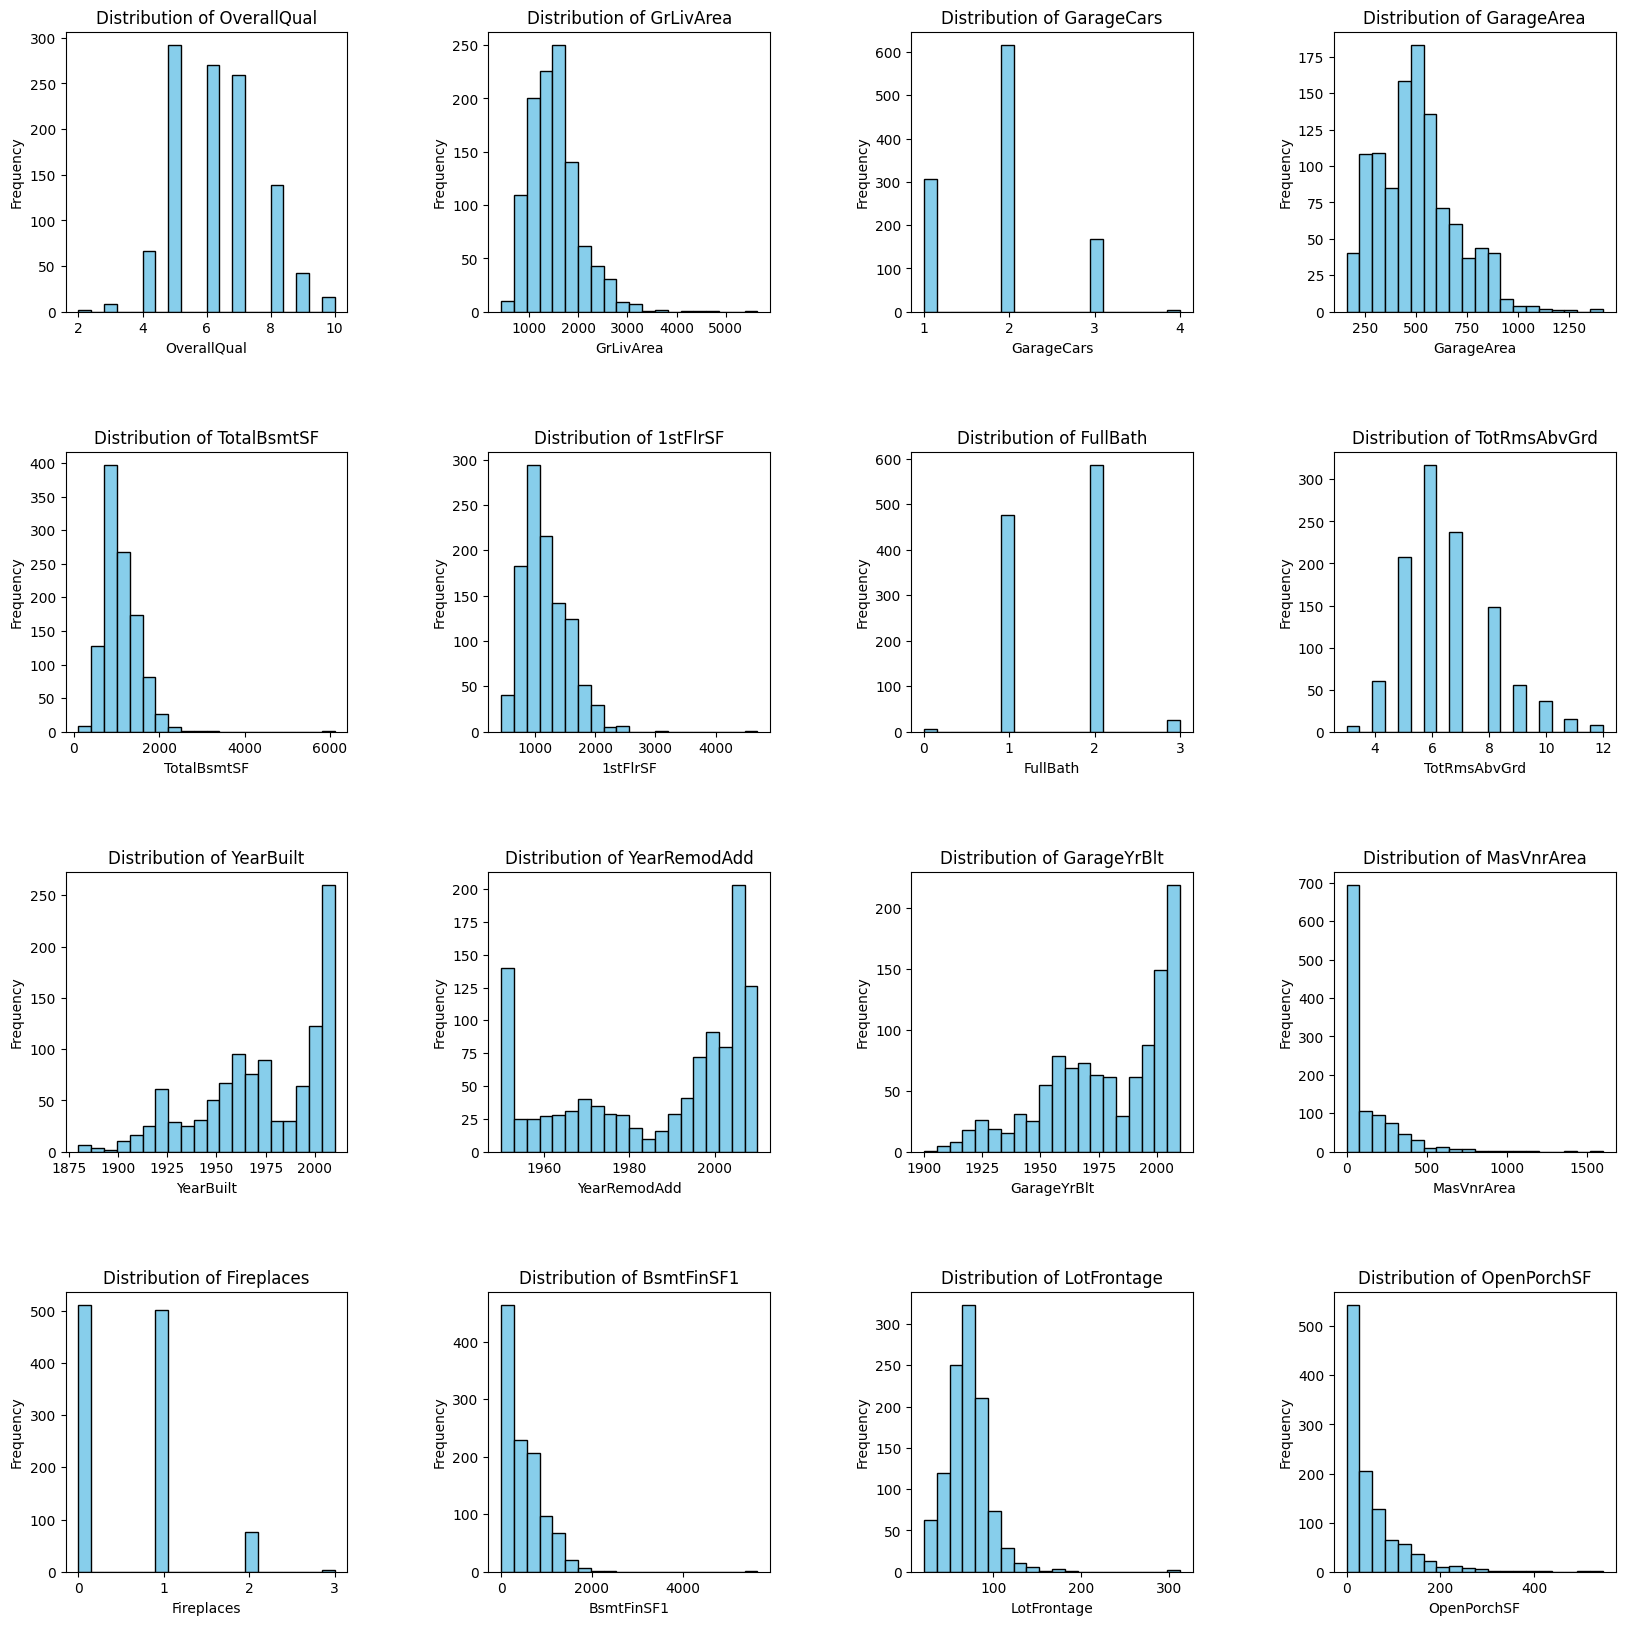

In [ ]:
hist_columns = df_train[[ 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
    'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
    'OpenPorchSF']]
hist_list = hist_columns.columns
import matplotlib.pyplot as plt
columns_to_plot = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
    'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
    'OpenPorchSF'
]
# Setting up the matplotlib figure and axes for a 4x4 grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plotting histograms in each subplot
for i, column in enumerate(columns_to_plot):
    ax = axes[i // 4, i % 4]
    ax.hist(hist_columns[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.show()

array([[<Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>,
        <Axes: xlabel='FullBath', ylabel='OverallQual'>,
        <Axes: xlabel='TotRmsAbvGrd', ylabel='OverallQual'>,
        <Axes: xlabel='YearBuilt', ylabel='OverallQual'>,
        <Axes: xlabel='YearRemodAdd', ylabel='OverallQual'>,
        <Axes: xlabel='GarageYrBlt', ylabel='OverallQual'>,
        <Axes: xlabel='MasVnrArea', ylabel='OverallQual'>,
        <Axes: xlabel='Fireplaces', ylabel='OverallQual'>,
        <Axes: xlabel='BsmtFinSF1', ylabel='OverallQual'>,
        <Axes: xlabel='LotFrontage', ylabel='OverallQual'>,
        <Axes: xlabel='OpenPorchSF', ylabel='OverallQual'>],
       [<Axes: xlabel='OverallQual', ylabel='GrLivAr

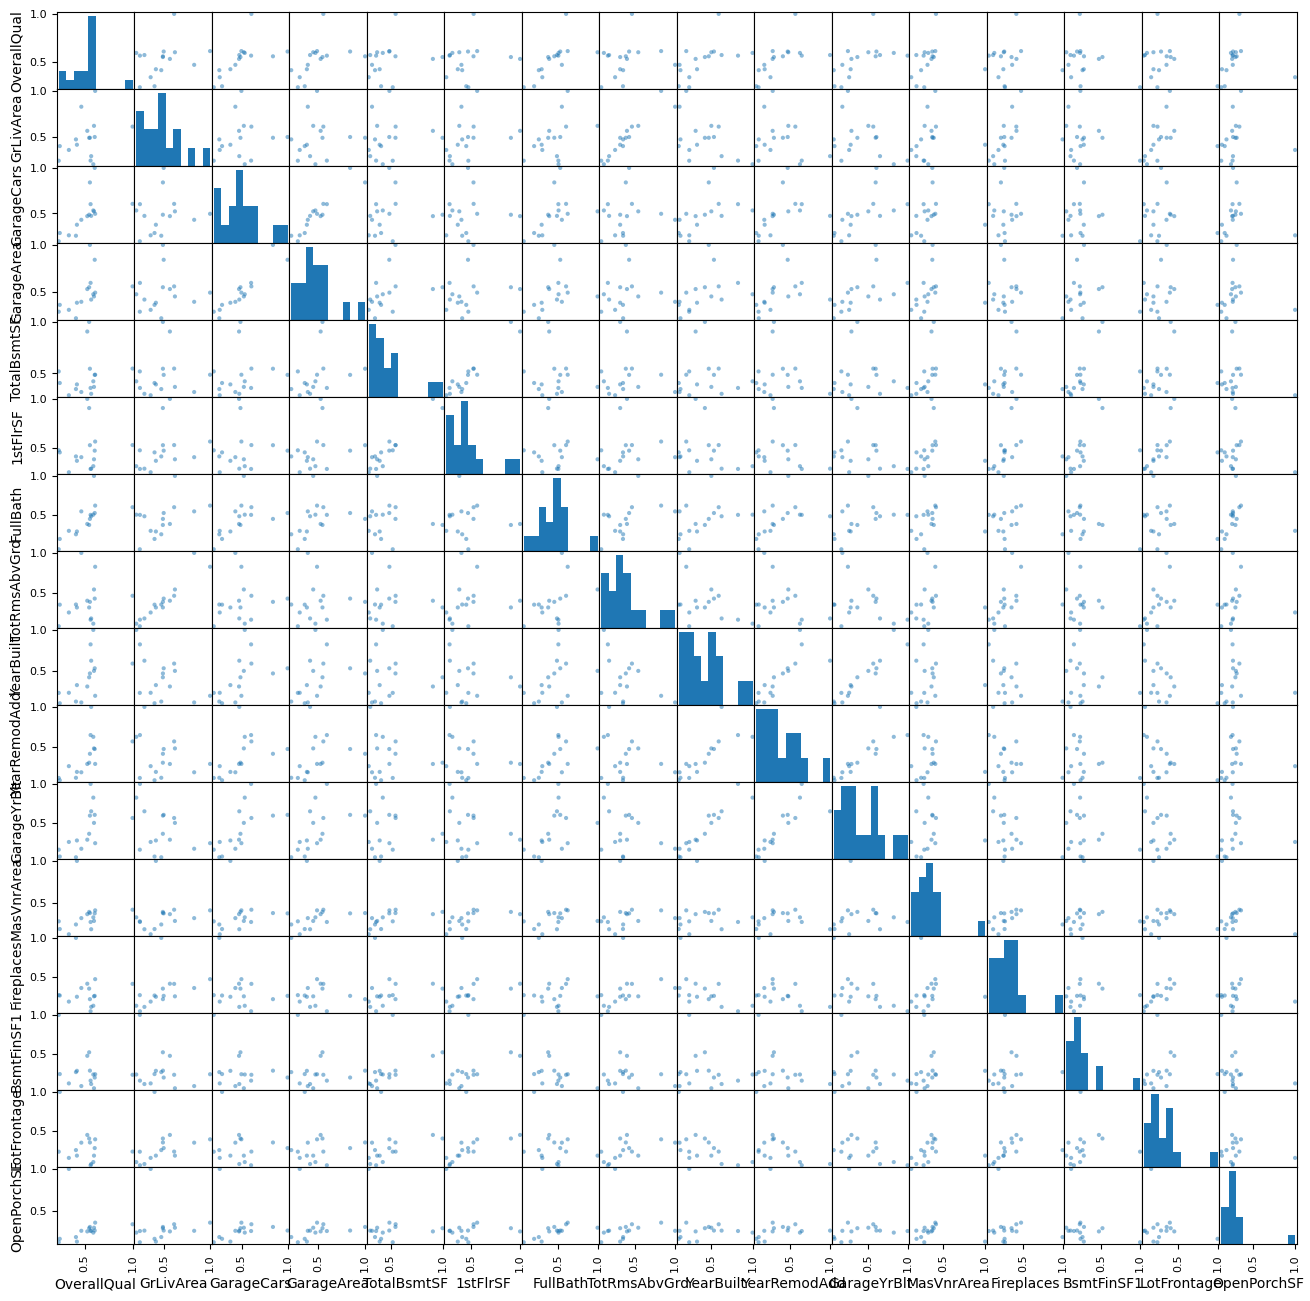

In [ ]:
numeric_matrix = hist_columns.corr()
numeric_matrix['OverallQual'].sort_values(ascending = False)
from pandas.plotting import scatter_matrix
scatter_matrix(numeric_matrix,figsize=(16,16))

Categorical Variables correlation with target (price)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
categorical.isnull().sum()
categorical.dropna(subset=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical'],inplace=True)
categorical.isnull().sum()

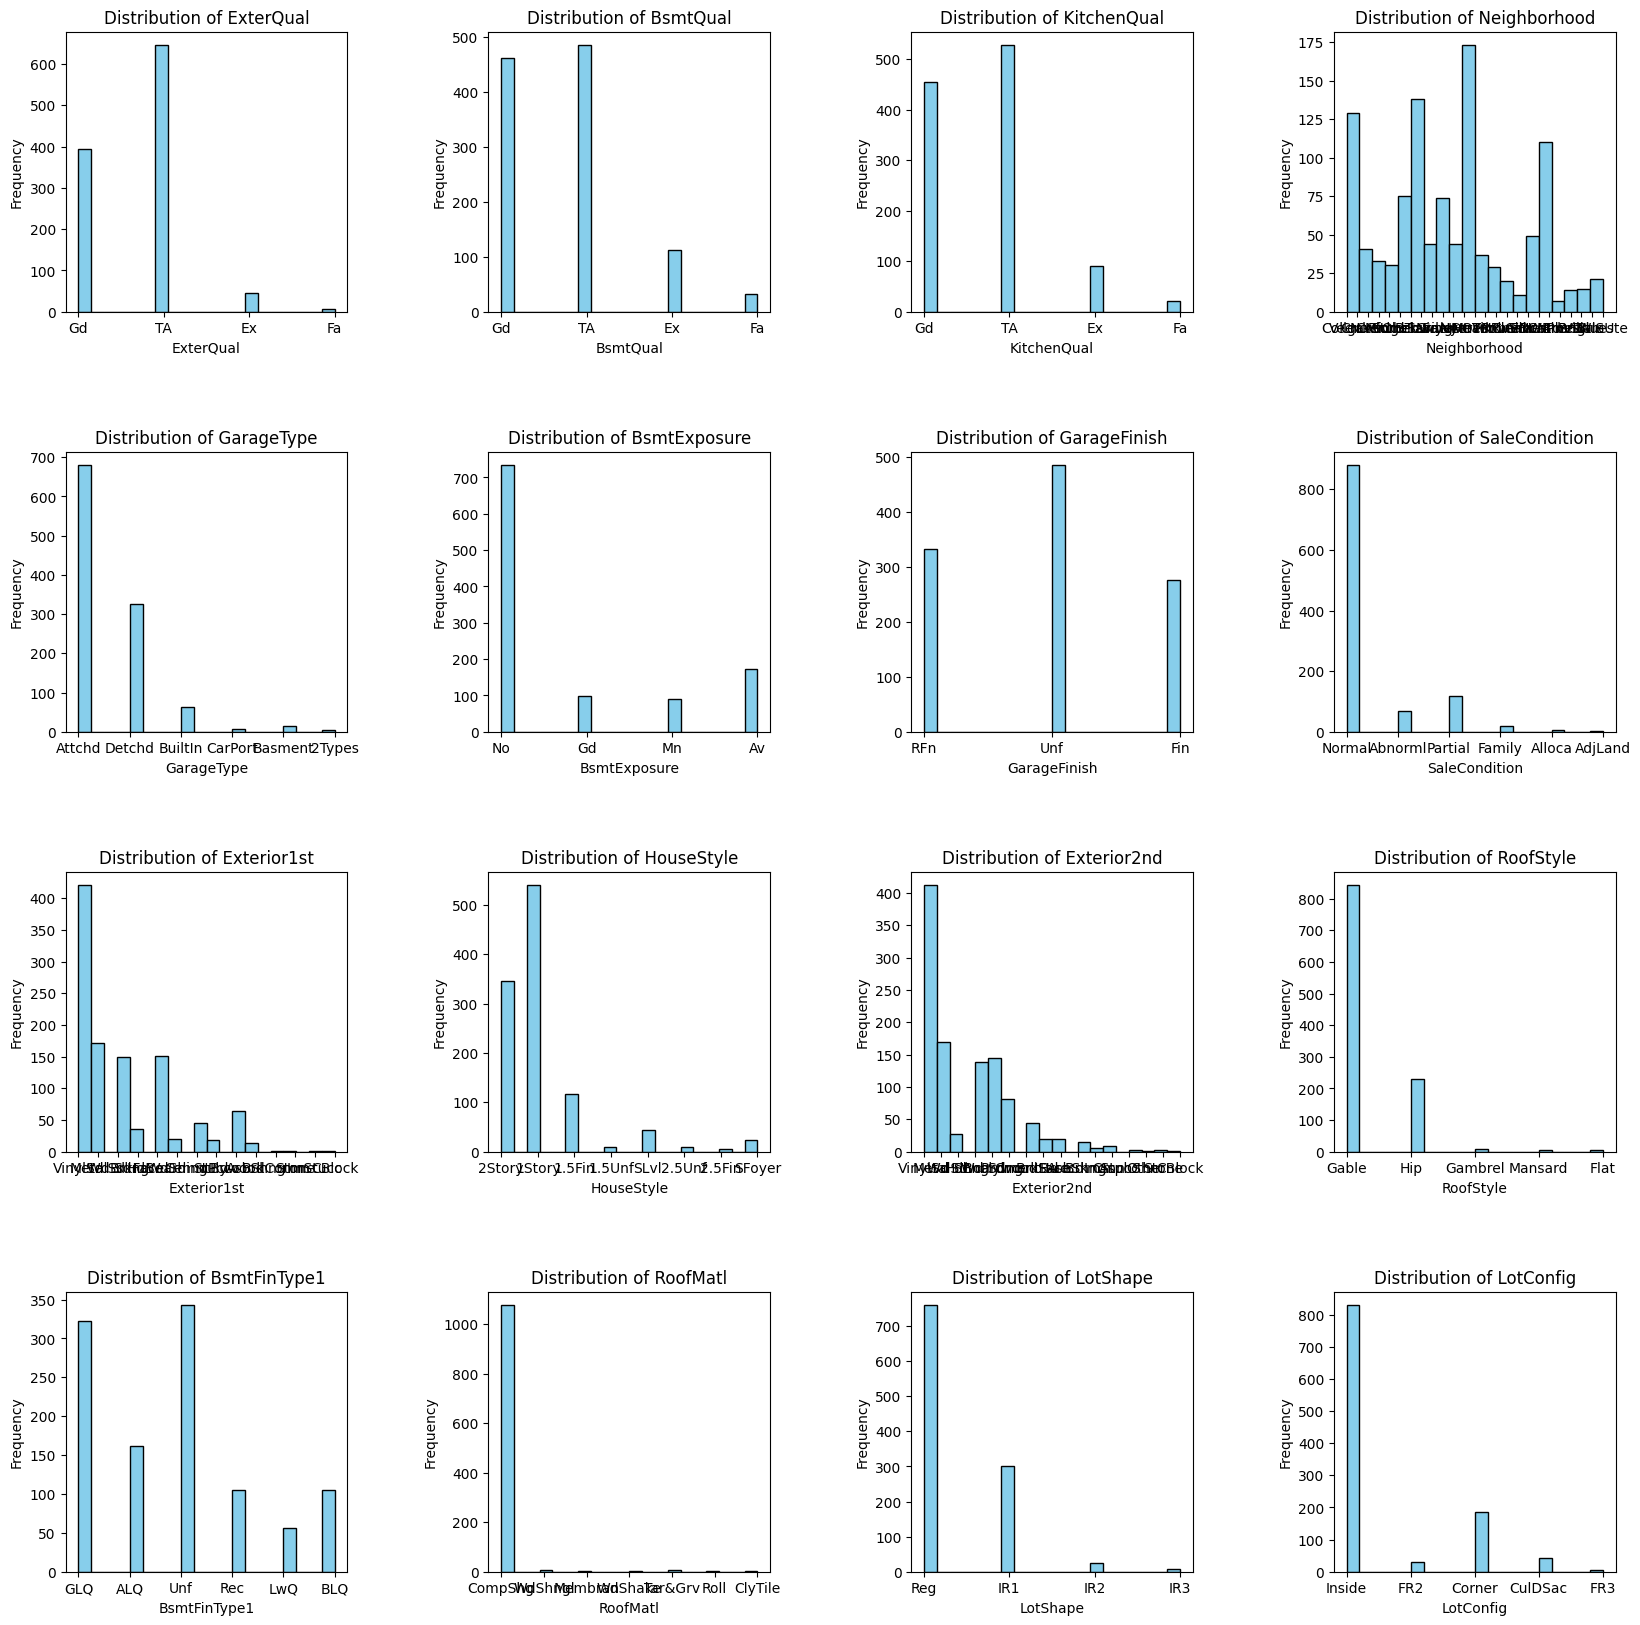

In [30]:
feature_names = [
    'ExterQual', 'BsmtQual', 'KitchenQual', 'Neighborhood', 'GarageType',
    'BsmtExposure', 'GarageFinish', 'SaleCondition', 'Exterior1st', 'HouseStyle',
    'Exterior2nd', 'RoofStyle', 'BsmtFinType1', 'RoofMatl', 'LotShape','LotConfig'
]
# Setting up the matplotlib figure and axes for a 4x4 grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plotting histograms in each subplot
for i, column in enumerate(feature_names):
    ax = axes[i // 4, i % 4]
    ax.hist(categorical[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
encoder = OrdinalEncoder()
categorical_encoded = encoder.fit_transform(categorical)
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=categorical.columns, index=categorical.index)
# Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit model
model.fit(categorical_encoded_df, y.values.ravel())  # Ensure y is the correct shape
# Get feature importances
importances = model.feature_importances_
# Create a DataFrame to view the features and their importance scores
features_df = pd.DataFrame({
   'Feature': categorical.columns,
   'Importance': importances
})
# Sort the DataFrame to see the most important features at the top
features_df.sort_values(by='Importance', ascending=False, inplace=True)
print(features_df.head(20))

          Feature  Importance
16      ExterQual    0.335666
19       BsmtQual    0.171993
28    KitchenQual    0.080115
7    Neighborhood    0.076520
30     GarageType    0.036681
21   BsmtExposure    0.024095
31   GarageFinish    0.023147
36  SaleCondition    0.021054
14    Exterior1st    0.019551
11     HouseStyle    0.019132
15    Exterior2nd    0.017420
12      RoofStyle    0.017211
22   BsmtFinType1    0.016460
13       RoofMatl    0.014081
2        LotShape    0.011029
5       LotConfig    0.010914
10       BldgType    0.010661
0        MSZoning    0.010520
17      ExterCond    0.009574
3     LandContour    0.009137


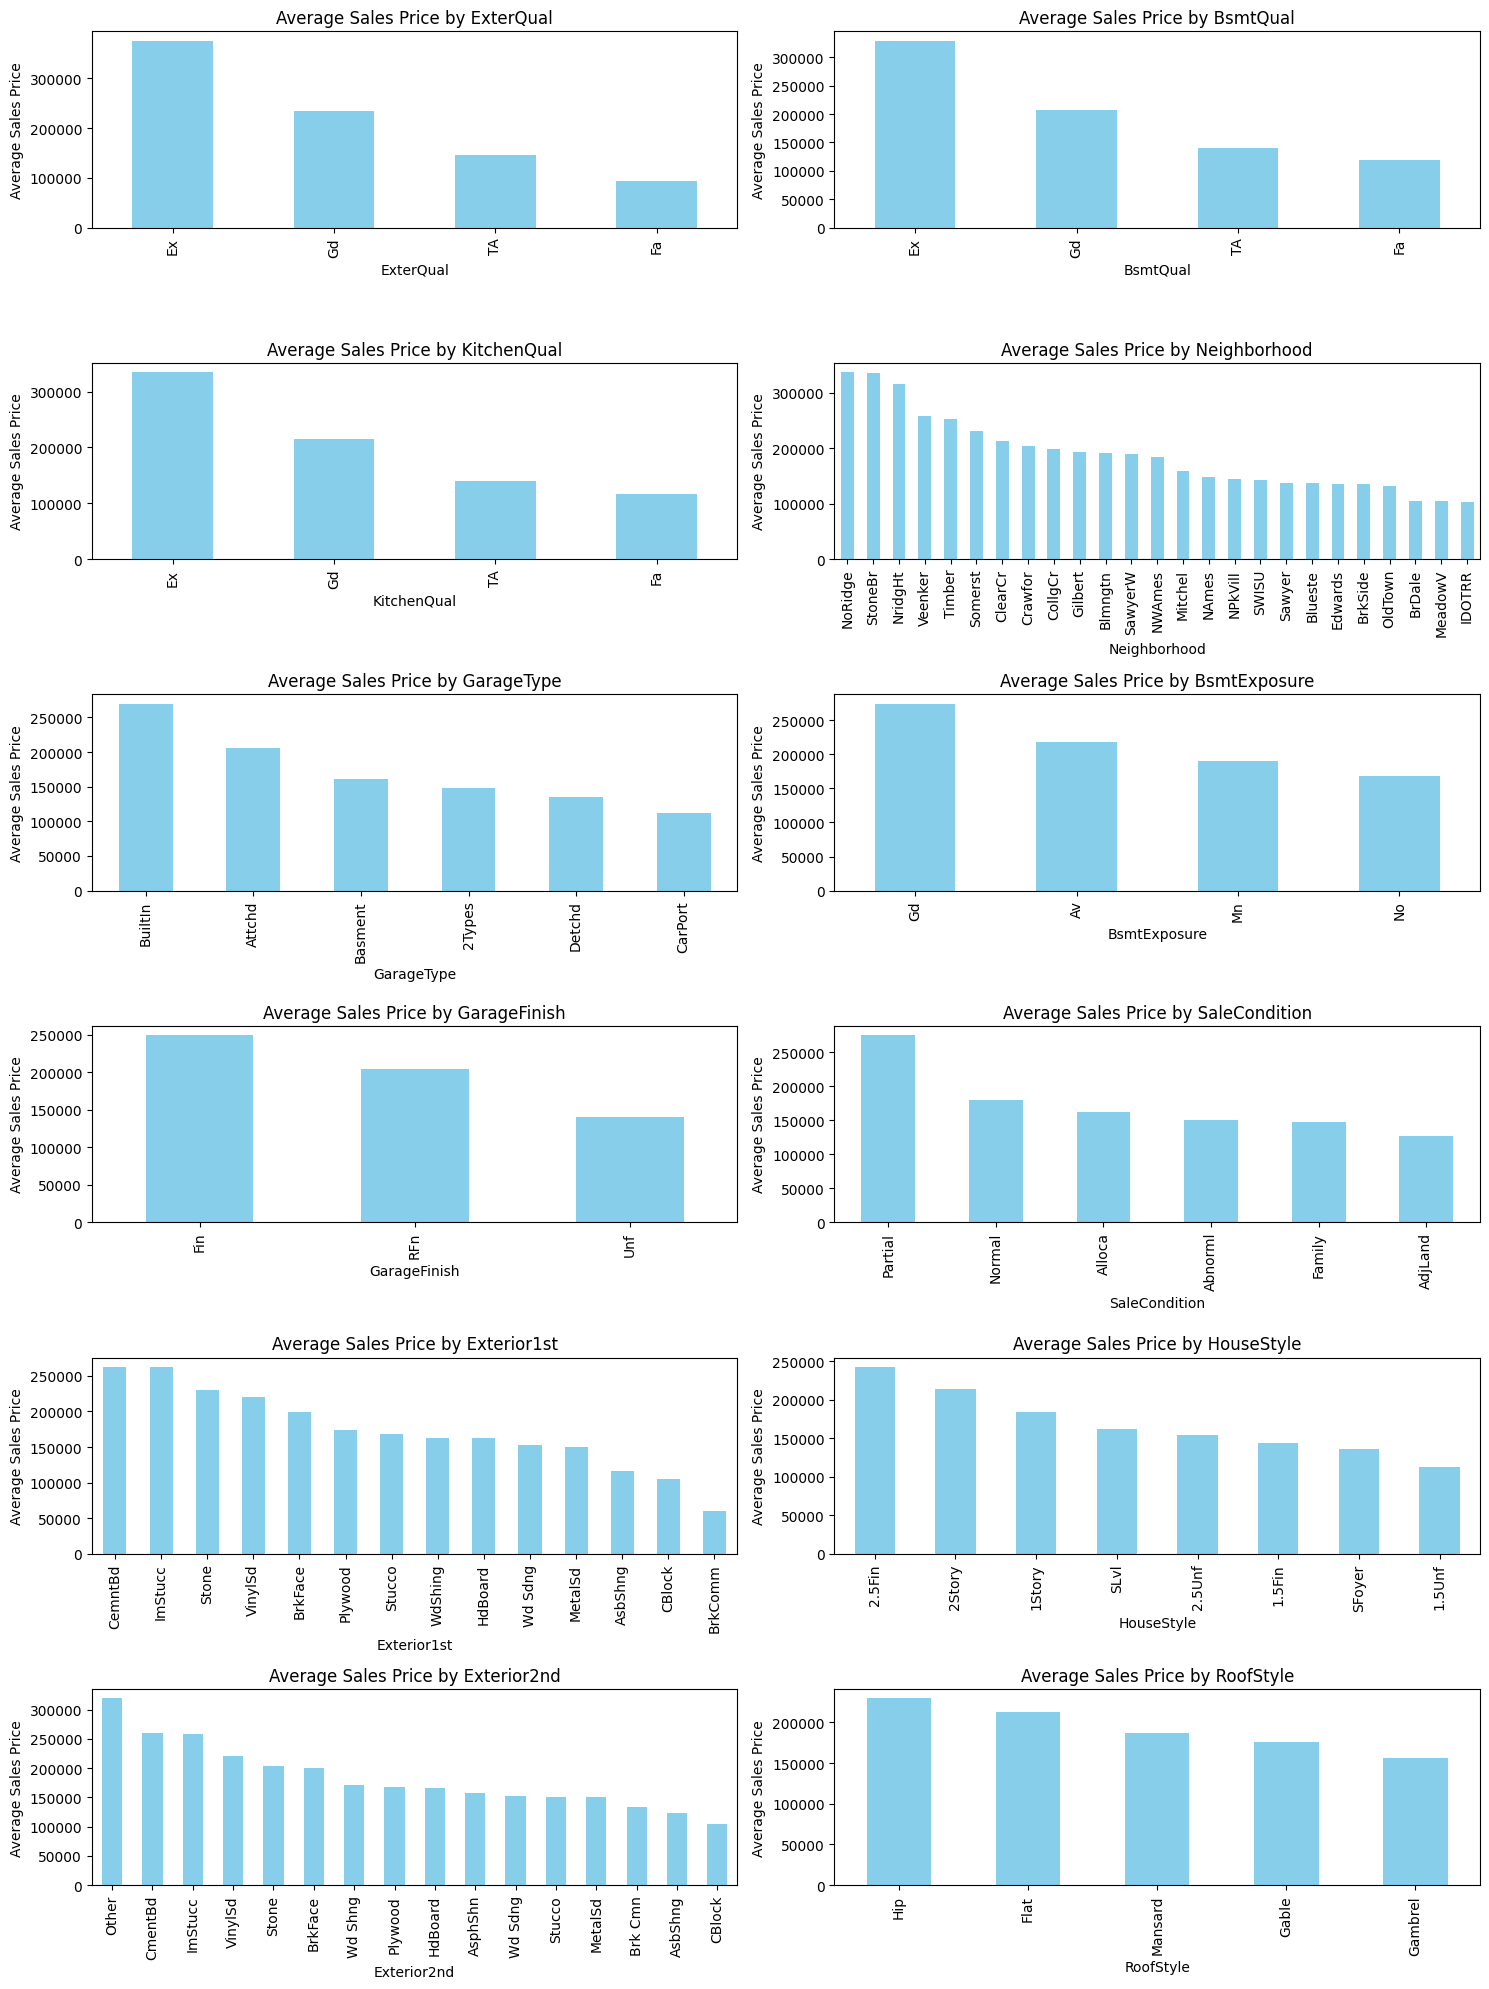

In [31]:
feature_names = [
    'ExterQual', 'BsmtQual', 'KitchenQual', 'Neighborhood', 'GarageType',
    'BsmtExposure', 'GarageFinish', 'SaleCondition', 'Exterior1st', 'HouseStyle',
    'Exterior2nd', 'RoofStyle', 'BsmtFinType1', 'RoofMatl', 'LotShape','LotConfig'
]
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))  # Adjust the layout as necessary

# List of features to plot
features = ['ExterQual','BsmtQual','KitchenQual','Neighborhood', 'GarageType', 'BsmtExposure', 'GarageFinish','SaleCondition','Exterior1st', 'HouseStyle', 'Exterior2nd', 'RoofStyle']

# Iterate over the features and create a bar plot for each
for i, feature in enumerate(features):
    ax = axes.flatten()[i]
    # Group by feature, calculate mean, and sort the values
    group_means = df_train.groupby(feature)['SalePrice'].mean().sort_values(ascending=False)
    group_means.plot(ax=ax, kind='bar', color='skyblue', title=f'Average Sales Price by {feature}')
    ax.set_ylabel('Average Sales Price')
    ax.set_xlabel(feature)  # Setting the x-label as the feature name for clarity

# Adjusting subplot for the last empty plot if the number of features is odd
if len(features) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])  # Remove the last subplot if unused

plt.tight_layout()
plt.show()

choose the best performed scaleing method using grid search

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
# Identifying categorical columns (assuming all are categorical)
categorical_columns = df_train_t.select_dtypes(include=['object']).columns

# One-hot encode all categorical columns
df_cat_dum = pd.get_dummies(df_train_t, columns=categorical_columns)
print(df_cat_dum)
for col in df_cat_dum.columns:
    if df_cat_dum[col].dtype == 'bool':
        df_cat_dum[col] = df_cat_dum[col].astype(int)

print(df_cat_dum)

In [ ]:
df_x = df_cat_dum.drop('SalePrice',axis=1)
df_y = df_train['SalePrice']
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [ ]:
# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Placeholder, will be overwritten by GridSearch
    ('regressor', Ridge())
])

# Grid search to find the best scaler
param_grid = {
    'scaler': [StandardScaler(),MinMaxScaler(), RobustScaler()]
}

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train_df, y_train_df)

print("Best parameters:", grid.best_params_)

Best parameters: {'scaler': MinMaxScaler()}


In [ ]:
# Select numeric columns
numeric_cols = df_train_t.select_dtypes(include=['int64', 'float64']).columns

# Initialize the RobustScaler
scaler = MinMaxScaler()

# Apply the scaler to the numeric columns
df_train_t[numeric_cols] = scaler.fit_transform(df_train_t[numeric_cols])

# Display the scaled DataFrame
print(df_train_t.head)

In [ ]:
# Identifying categorical columns (assuming all are categorical)
categorical_columns = df_train_t.select_dtypes(include=['object']).columns

# One-hot encode all categorical columns
one_hot_encoded_data = pd.get_dummies(df_train_t, columns=categorical_columns)
#print(one_hot_encoded_data)

In [ ]:
#for col in one_hot_encoded_data.columns:
    #if one_hot_encoded_data[col].dtype == 'bool':
        #one_hot_encoded_data[col] = one_hot_encoded_data[col].astype(int)

#print(one_hot_encoded_data)

In [ ]:
# Check columns in X_train_p that aren't in X_test_p
#columns_in_train_not_in_test = X_train_p.columns.difference(X_test_p.columns)

# Check columns in X_test_p that aren't in X_train_p
#columns_in_test_not_in_train = X_test_p.columns.difference(X_train_p.columns)

#print("Columns in X_train_p but not in X_test_p:", columns_in_train_not_in_test)
#print("Columns in X_test_p but not in X_train_p:", columns_in_test_not_in_train)

Columns in X_train_p but not in X_test_p: Index(['Condition2_RRNn', 'Electrical_Mix', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'GarageQual_Ex', 'Heating_Grav', 'Heating_OthW', 'HouseStyle_2.5Fin',
       'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Roll'],
      dtype='object')
Columns in X_test_p but not in X_train_p: Index(['ExterCond_Po', 'RoofStyle_Shed'], dtype='object')


In [ ]:
#X_train_p = X_train_p.drop(columns = columns_of_train)

In [ ]:
#columns_of_interest = ['ExterCond_Po', 'RoofStyle_Shed']

In [ ]:
# Initialize and train the GradientBoostingRegressor
#model = GradientBoostingRegressor()
#model.fit(X_train_p, y_train_p)

GradientBoostingRegressor()

In [ ]:
x =  one_hot_encoded_data.drop(['Id','SalePrice'], axis=1)
y = one_hot_encoded_data['SalePrice']

In [ ]:
one_hot_encoded_data.info()

In [ ]:
# train the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
Data modeling

In [ ]:
import numpy as np
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import ElasticNet, Lasso, RidgeCV,LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Define a simple TensorFlow Keras model for feature transformation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
reg = StackingRegressor(
    estimators=[('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('svr', SVR(C=1, gamma=1e-6))],
    final_estimator=GradientBoostingRegressor(random_state=42))

In [ ]:
classifiers = [
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5),
    Lasso(alpha =16, random_state=100),
    LassoCV(random_state=42),
    ElasticNet(alpha=0.8),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    AdaBoostRegressor(),
    SVR(),
    LinearSVR(),
    NuSVR(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor(),
    reg
    ]

name = []
score = []
models = []
rmse = []
name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

In [ ]:
df_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score

,rmse,score,model
name,,,
Lasso,0.120521,-0.000134,"Lasso(alpha=16, random_state=100)"
ElasticNet,0.120521,-0.000134,ElasticNet(alpha=0.8)
SVR,0.063660,0.720960,SVR()
KNeighborsRegressor,0.057175,0.774914,KNeighborsRegressor()
DecisionTreeRegressor,0.055505,0.787871,DecisionTreeRegressor()
AdaBoostRegressor,0.046688,0.849916,"(DecisionTreeRegressor(max_depth=3, random_sta..."
NuSVR,0.043328,0.870737,NuSVR()
KernelRidge,0.042181,0.877491,"KernelRidge(alpha=0.6, coef0=2.5, kernel='poly..."
LassoCV,0.041211,0.883061,LassoCV(random_state=42)


In [ ]:
#model deployment

In [ ]:
df_train_cur = df_train.drop(['SalePrice', 'Id'],axis=1)
df_test_cur = df_test.drop('Id',axis=1)

In [ ]:
# Select numeric columns
numeric_cols = df_train_cur.select_dtypes(include=['int64', 'float64']).columns

# Initialize the RobustScaler
scaler = MinMaxScaler()

# Apply the scaler to the numeric columns
df_train_cur[numeric_cols] = scaler.fit_transform(df_train_cur[numeric_cols])

# Display the scaled DataFrame
print(df_train_cur.head)

In [ ]:
# Select numeric columns
numeric_cols_test = df_test_cur.select_dtypes(include=['int64', 'float64']).columns

# Initialize the RobustScaler
scaler = MinMaxScaler()

# Apply the scaler to the numeric columns
df_test_cur[numeric_cols_test] = scaler.fit_transform(df_test_cur[numeric_cols_test])

# Display the scaled DataFrame
print(df_test_cur.head)

In [ ]:
# Identifying categorical columns (assuming all are categorical)
categorical_columns_train = df_train_cur.select_dtypes(include=['object']).columns

# One-hot encode all categorical columns
one_hot_encoded_data_train = pd.get_dummies(df_train_cur, columns=categorical_columns_train)
print(one_hot_encoded_data_train)

for col in one_hot_encoded_data_train.columns:
    if one_hot_encoded_data_train[col].dtype == 'bool':
        one_hot_encoded_data_train[col] = one_hot_encoded_data_train[col].astype(int)

print(one_hot_encoded_data_train)

In [ ]:
# Identifying categorical columns (assuming all are categorical)
categorical_columns_test = df_test.select_dtypes(include=['object']).columns

# One-hot encode all categorical columns
one_hot_encoded_data_test = pd.get_dummies(df_test, columns=categorical_columns_test)
print(one_hot_encoded_data_test)
for col in one_hot_encoded_data_test.columns:
    if one_hot_encoded_data_test[col].dtype == 'bool':
        one_hot_encoded_data_test[col] = one_hot_encoded_data_test[col].astype(int)

print(one_hot_encoded_data_test)

In [ ]:
X_train_p = one_hot_encoded_data_train
y_train_p = df_train['SalePrice']

In [ ]:
df_train['Id']

In [ ]:
X_test_p = one_hot_encoded_data_test.drop('Id',axis=1)

In [ ]:
# Check columns in X_train_p that aren't in X_test_p
columns_in_train_not_in_test = X_train_p.columns.difference(X_test_p.columns)

# Check columns in X_test_p that aren't in X_train_p
columns_in_test_not_in_train = X_test_p.columns.difference(X_train_p.columns)

print("Columns in X_train_p but not in X_test_p:", columns_in_train_not_in_test)
print("Columns in X_test_p but not in X_train_p:", columns_in_test_not_in_train)

Columns in X_train_p but not in X_test_p: Index(['Condition2_RRNn', 'Electrical_Mix', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'GarageQual_Ex', 'Heating_Grav', 'Heating_OthW', 'HouseStyle_2.5Fin',
       'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Roll'],
      dtype='object')
Columns in X_test_p but not in X_train_p: Index(['ExterCond_Po', 'RoofStyle_Shed'], dtype='object')


In [ ]:
columns_of_train = ['Condition2_RRNn', 'Electrical_Mix', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'GarageQual_Ex', 'Heating_Grav', 'Heating_OthW', 'HouseStyle_2.5Fin',
       'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Roll']
columns_of_test = ['ExterCond_Po', 'RoofStyle_Shed']

In [ ]:
X_train_p = X_train_p.drop(columns = columns_of_train)
X_test_p = X_test_p.drop(columns = columns_of_test)

In [ ]:
# Initialize and train the GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train_p, y_train_p)

GradientBoostingRegressor()

In [ ]:
#Predicting the SalePrice for df_test
predicted_prices = model.predict(X_test_p)

In [ ]:
predicted_prices

array([0.41822762, 0.36795531, 0.66199207, ..., 0.63536817, 0.42172074,
       0.68083156])

In [ ]:
submission = pd.DataFrame({
    "Id": df_test['Id'],
    "SalePrice": predicted_prices
})
path = '/content/drive/My Drive/ML/price_submission.csv'
submission.to_csv(path)